## **Υπολογιστική Γεωμετρία**



### ***Υλοποίηση 1***

1)
- Ο **Aυξητικός Aλγόριθμος** είναι μια καθιερωμένη τεχνική αλγοριθμικής σχεδίασης με την οποία θα προσθέτουμε τα σημεία στο σύνολο Ρ ένα προς ένα και θα ενημερώνουμε κατάλληλα την τρέχουσα λύση. θα υπολογίσουμε πρώτα μόνο τις κορυφές που ανήκουν στο άνω περίβλημα, που περιλαμβάνει τις ακμές του κυρτού περιβλήματος που οριοθετούν το περίβλημα από επάνω και στη συνέχεια το κάτω περίβλημα, όπου είναι το υπόλοιπο μέρος του κυρτού περιβλήματος.




In [ ]:
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.spatial import ConvexHull, convex_hull_plot_2d

#Αυξητικός Αλγόριθμος

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q.y - p.y) * (r.x - q.x) - \
          (q.x - p.x) * (r.y - q.y)

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def convex_hull(points):
    n = len(points)

    if n < 3:
        return None

    # Find the point with the lowest y-coordinate
    lowest = min(points, key=lambda p: (p.y, p.x))

    # Sort the points by polar angle with respect to the lowest point
    sorted_points = sorted(points, key=lambda p: (polar_angle(lowest, p), distance(lowest, p)))

    # Initialize the stack with the first three points
    stack = [sorted_points[0], sorted_points[1], sorted_points[2]]

    for i in range(3, n):
        while len(stack) > 1 and orientation(stack[-2], stack[-1], sorted_points[i]) != 2:
            stack.pop()

        stack.append(sorted_points[i])

    return stack

def polar_angle(pivot, point):
    """
    Function to calculate the polar angle in radians between the pivot point and a given point.
    """
    dx = point.x - pivot.x
    dy = point.y - pivot.y

    return math.atan2(dy, dx)

def distance(p1, p2):
    """
    Function to calculate the squared Euclidean distance between two points.
    """
    dx = p1.x - p2.x
    dy = p1.y - p2.y

    return dx * dx + dy * dy


points = []
points.append(Point(-10, 5))
points.append(Point(-2, -10))
points.append(Point(1, 7))
points.append(Point(3, 4))
points.append(Point(5, 6))
points.append(Point(9, 3))
points.append(Point(11, 8))
points.append(Point(15,-11))
points.append(Point(18,-3))
points.append(Point(24,-8))

hull = convex_hull(points)

print("Convex Hull:")
for point in hull:
    print(f"({point.x}, {point.y})")


Convex Hull:
(15, -11)
(24, -8)
(11, 8)
(1, 7)
(-10, 5)
(-2, -10)


- Ο **αλγόριθμος του Περιτυλίγματος** χρησιμοποιεί την ακμή του πολυγώνου που μόλις βρήκε για να βρει την επόμενη.

In [ ]:
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

#Αλγόριθμος Περιτυλίγματος

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def Left_index(points):

    '''
    Finding the left most point
    '''
    min = 0
    for i in range(1,len(points)):
        if points[i].x < points[min].x:
            min = i
        elif points[i].x == points[min].x:
            if points[i].y > points[min].y:
                min = i
    return min

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q.y - p.y) * (r.x - q.x) - \
          (q.x - p.x) * (r.y - q.y)

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def gift_wrapping(points):
    n = len(points)

    if n < 3:
        return []

    hull = []

    leftmost = min(points, key=lambda p: p.x)
    hull.append(leftmost)

    p = points.index(leftmost)
    q = None

    while True:
        q = (p + 1) % n

        for r in range(n):
            if orientation(points[p], points[q], points[r]) == 2:
                q = r

        if points[q] == leftmost:
            break

        hull.append(points[q])
        p = q

    return hull


points = []
points.append(Point(-10, 5))
points.append(Point(-2, -10))
points.append(Point(1, 7))
points.append(Point(3, 4))
points.append(Point(5, 6))
points.append(Point(9, 3))
points.append(Point(11, 8))
points.append(Point(15,-11))
points.append(Point(18,-3))
points.append(Point(24,-8))

convex_hull_points = gift_wrapping(points)

print("Convex Hull:")
for point in convex_hull_points:
    print(f"({point.x}, {point.y})")

Convex Hull:
(-10, 5)
(1, 7)
(11, 8)
(24, -8)
(15, -11)
(-2, -10)


- Ο **αλγόριθμος** **Δαίρει και Βασίλευε** βασίζεται στον χωρισμό του προβλήματος σε 2 προβλήματα που έχουν μέγεθος το μισό (σχεδόν) του αρχικού προβλήματος. Λύνοντας αναδρομικά τα 2 υποπροβλήματα και συγχωνεύοντας τη λύση τους καταλήγουμε σε λύση του αρχικού προβλήματος. Τα 2 υποπροβλήματα είναι συχνά αρκετά μικρά και έτσι λύνονται εύκολα. Άρα, το κλειδί είναι η αποτελεσματική εκτέλεση της συγχώνευσης των λύσεων.

In [ ]:
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math

#Διαίρει και Βασίλευε

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q.y - p.y) * (r.x - q.x) - \
          (q.x - p.x) * (r.y - q.y)

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def convex_hull(points):
    n = len(points)

    if n < 3:
        return []

    hull = []

    leftmost = min(points, key=lambda p: p.x)
    hull.append(leftmost)

    p = points.index(leftmost)
    q = None

    while True:
        q = (p + 1) % n

        for r in range(n):
            if orientation(points[p], points[q], points[r]) == 2:
                q = r

        if points[q] == leftmost:
            break

        hull.append(points[q])
        p = q

    return hull


# main

points = []
points.append(Point(-10, 5))
points.append(Point(-2, -10))
points.append(Point(1, 7))
points.append(Point(3, 4))
points.append(Point(5, 6))
points.append(Point(9, 3))
points.append(Point(11, 8))
points.append(Point(15,-11))
points.append(Point(18,-3))
points.append(Point(24,-8))


convex_hull_points = convex_hull(points)


print("Convex Hull:")
for point in convex_hull_points:
    print(f"({point.x}, {point.y})")

Convex Hull:
(-10, 5)
(1, 7)
(11, 8)
(24, -8)
(15, -11)
(-2, -10)


- O **αλγόριθμος QuickHull** απορρίπτει αρκετά σημεία που θα βρίσκονται σίγουρα στο εσωτερικό του κυρτού περιβλήματος. Αρχικά βρίσκει τα 4 ακραία σημεία (πάνω-κάτω-δεξιά-αριστερά), ενώνει τα σημεία αυτά και σχηματίζεται ένα τετράπλευρο και υπολογίζει το κυρτό περίβλημα σε κάθε μια από τις 4 περοχές.


In [ ]:
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math

#Quickhull αλγόριθμος

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q.y - p.y) * (r.x - q.x) - \
          (q.x - p.x) * (r.y - q.y)

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def distance(p1, p2, p):
    return ((p2.y - p1.y) * p.x - (p2.x - p1.x) * p.y + p2.x * p1.y - p2.y * p1.x) / \
           ((p2.y - p1.y) ** 2 + (p2.x - p1.x) ** 2) ** 0.5


def find_furthest_point(points, p1, p2):
    max_distance = 0
    furthest_point = None

    for p in points:
        d = distance(p1, p2, p)
        if d > max_distance:
            max_distance = d
            furthest_point = p

    return furthest_point


def find_hull(points, p1, p2, convex_hull):
    if len(points) == 0:
        return

    furthest_point = find_furthest_point(points, p1, p2)
    convex_hull.insert(convex_hull.index(p2), furthest_point)

    points.remove(furthest_point)

    points_left = []
    points_right = []

    for p in points:
        if distance(p1, furthest_point, p) > 0:
            points_left.append(p)
        elif distance(furthest_point, p2, p) > 0:
            points_right.append(p)

    find_hull(points_left, p1, furthest_point, convex_hull)
    find_hull(points_right, furthest_point, p2, convex_hull)


def quick_hull(points):
    if len(points) < 3:
        return points

    leftmost = min(points, key=lambda p: p.x)
    rightmost = max(points, key=lambda p: p.x)

    convex_hull = []

    convex_hull.append(leftmost)
    convex_hull.append(rightmost)

    points.remove(leftmost)
    points.remove(rightmost)

    points_left = []
    points_right = []

    for p in points:
        if distance(leftmost, rightmost, p) > 0:
            points_left.append(p)
        elif distance(leftmost, rightmost, p) < 0:
            points_right.append(p)

    find_hull(points_left, leftmost, rightmost, convex_hull)
    find_hull(points_right, rightmost, leftmost, convex_hull)

    return convex_hull

points = []
points.append(Point(-10, 5))
points.append(Point(-2, -10))
points.append(Point(1, 7))
points.append(Point(3, 4))
points.append(Point(5, 6))
points.append(Point(9, 3))
points.append(Point(11, 8))
points.append(Point(15,-11))
points.append(Point(18,-3))
points.append(Point(24,-8))

convex_hull_points = quick_hull(points)

print("Convex Hull:")
for point in convex_hull_points:
    print(f"({point.x}, {point.y})")


Convex Hull:
(11, 8)
(1, 7)
(-10, 5)
(-2, -10)
(15, -11)
(24, -8)


2) Με τον όρο εκφυλισμός έννοουμε μιά ειδική κατάσταση οπου μια γεωμετρική
σχέση χάνει την κανονική της μορφή. Στη συγκέκριμένη
περίπτωση, αναφερόμαστε στο γεγονός οτι ο αλγόριθμος παράγει λανθασμένα
αποτελέσματα όταν δεν μπορούν να εφαρμοστούν πλήρως και ορθά οι κανόνες
του.

Ειδικότερα, αν εξετάσουμε την περίπτωση του **αυξητικού αλγόριθμου** για την
εύρεση κυρτού περιβλήματος στο επίπεδο, θα δούμε πως όταν υπάρχουν
σφάλματα στις πράξεις κινητής υποδιαστολής ενδέχεται να μην συμπεριληφθεί
στο σύνορο του κυρτού περιβλήματος κάποιο σημείο που θα έπρεπε να
συμπεριληφθεί, είτε να συμπεριληφθεί κάποιο σημείο που στην
πραγματικότητα βρίσκεται στο εσωτερικό του περιβλήματος. Ο αλγόριθμος
πάραυτα υπολογίζει σίγουρα μια κλειστή πολυγωνική αλυσίδα. Το μόνο πιθανό
πρόβλημα που εξακολουθεί να υπάρχει είναι νά εκληφθεί ως δεξιά στροφή μια
οξεία άριστερή στροφή που ορίζεται από 3 κοντινά σημεία. Αυτό θα μπορούσε
να προκαλέσει στο τελικό πολύγωνο ένα "βαθούλωμα". Ένας τρόπος να
αντιμετωπίσουμε αυτό το κώλυμα είναι να φροντίσουμε τα σημεία της εισόδου
που είναι πολύ κοντινά να αντιμετωπίζονται ως ένα σημείο. Με αυτόν τον τρόπο
το αποτέλεσμα ίσως να μην είναι μεν απόλυτα ορθό αλλά θα έχει νόημα.  

Όσον αφορά τον **αλγόριθμο του περιτυλίγματος**, αν τα σημεία που δίνονται
σαν είσοδος είναι συνευθειακά, ο αλγόριθμος μπορεί να παράγει λάθασμένα
αποτελέσματα και το κυρτό περίβλημα αντί για την σωστή μορφή να είναι ένα
ευθύγραμμο τμήμα. Επιπροσθέτως, αν υπάρχουν διπλά σημεία, δηλαδή σημεία με
ιδίες συντεταγμένες, στο σύνολο εισόδου, ο αλγόριθμος μπορεί να
αντιμετωπίσει προβλήματα κατά την επιλογή του επόμενου σημείου που θα
περικυκλώσει. Αυτό μπορεί να οδηγήσει σε άπειρους βρόχους ή σε εσφαλμένο
υπολογισμό του κυρτού περιβλήματος. Σημειώνουμε επίσης ότι ο αλγόριθμος,
όπως και ο αλγόριθμος για τις άκραίες άκρες, θα πρέπει να τροποποιηθεί αν
θέλουμε να χειρίζεται και συνολικά σημεία που δεν είναι σε γενική θέση.

Η μέθοδος **Διαίρει και Βασίλευε** είναι μια τεχνική επίλυσης προβλημάτων που
έχει αποδειχθεί ιδιαίτερα αποτελεσματική σε πολλούς τομείς. Στη δική μας
περίπτωση όμως, αν τα σημεία είναι τοποθετημένα με έναν τρόπο που είναι
κάτα μήκος μιας γραμμής ή κάθετα σε αυτή, τότε ο αλγόριθμος ενδέχεται να μην
λειτουργεί σωστά και να κάνει λάθη στην επανάληψη ή διάδικασία
διαίρεσης. Επιπροσθέτως, βασικό στοιχείο αυτής της μεθόδου είναι η διαίρεση σε
μικρότερα τμήματα. Όταν θεωρήσουμε όμως μια περίπτωση όπου τα σημεία
που δίνονται στην είσοδο είναι ταυτοσήμα, τότε καθίσταται δύσκολη η
δημιουργία ουσιαστικών διαμερισμάτων στο χώρο. Δηλαδή, εάν τα
υποπροβλήματα έχουν επικαλυπτόμενα ή συμπίπτοντα όρια, η διαδικασία
συγχώνευσης μπορεί να χρειαστεί να χειριστεί ξεχωριστά αυτές τις περιπτώσεις
για να αποφύγουμε εσφαλμένα αποτελέσματα.

Ακόμα ένας αποδοτικός αλγόριθμος είναι ο **QuickHull**, ο οποίος απορρίπτει
αρκετά σημεία τα οποία βρίσκονται σίγουρα στο εσωτερικό του κυρτού
περιβλήματος. Όπως και με τις προηγούμενες μεθόδους, ο αλγόριθμος θα
παράγει εσφαλμένο αποτέλεσμα σε περίπτωση συνευθείων σημείων εισόδου.
Επιπρόσθετα, ο QuickHull λειτουργεί με αριθμητική κινητή υποδιάσταση, η οποία
έχει περιορισμούς στην ακριβή αναπαράσταση πραγματικών αριθμών. Τα
σφάλματα ακρίβειας μπορούν να συσσωρευτούν κατά την εκτέλεση του
αλγορίθμου, οδηγώντας σε λανθασμένη μορφή του κυρτού περιβλήματος. Η
τεχνική αυτή περιλαμβάνει επίσης και τη σύγκριση αριθμών κινητής
υποδιάστασης για διάφορα γεωμετρικά τεστ, που μπορεί να οδηγήσει σε
ασυνέπειες λόγω σφαλμάτων ακρίβειας. Είναι λοιπόν συνετό να χειριζόμαστε με
εύλογη ιατρία τις πράξεις που αφορούν τις συντεταγμένες των σημείων.

3) Για την εύρεση του κυρτού περιβλήματος σε τρεις διαστάσεις χρησιμοποιούμε την συνάρτηση ConvexHull της βιβλιοθήκης SciPy της Python, που υλοποιεί τον αλγόριθμο QuickHull.

In [ ]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Generate random points
num_points = 20
points = np.random.rand(num_points, 3)
print("Points: ", points)

# Compute convex hull
hull = ConvexHull(points)

# Print convex hull points
convex_hull_points = hull.points[hull.vertices]
print("Convex Hull Points: ")
print(convex_hull_points)


Points:  [[0.76097898 0.67899461 0.14077308]
 [0.15370063 0.79026247 0.35468065]
 [0.78576071 0.22771298 0.26509152]
 [0.20301082 0.44292995 0.18599194]
 [0.8930448  0.03549154 0.03317386]
 [0.41433413 0.84286684 0.99361857]
 [0.20977768 0.9908294  0.47090133]
 [0.65138145 0.59063167 0.67812426]
 [0.72840483 0.26659349 0.0816898 ]
 [0.0528975  0.41268931 0.28730663]
 [0.82742272 0.66570254 0.9445873 ]
 [0.93071981 0.77958752 0.37492349]
 [0.50912689 0.11120542 0.11607963]
 [0.31602187 0.64999292 0.22868211]
 [0.38457629 0.66563251 0.52842203]
 [0.69299066 0.92622645 0.05871368]
 [0.58893547 0.54578211 0.69769739]
 [0.5863336  0.760055   0.28744453]
 [0.0404411  0.48157567 0.79036837]
 [0.39675625 0.62226725 0.87088875]]
Convex Hull Points: 
[[0.15370063 0.79026247 0.35468065]
 [0.20301082 0.44292995 0.18599194]
 [0.8930448  0.03549154 0.03317386]
 [0.41433413 0.84286684 0.99361857]
 [0.20977768 0.9908294  0.47090133]
 [0.0528975  0.41268931 0.28730663]
 [0.82742272 0.66570254 0.9445873

### ***Εφαρμογή 1***

1. (α') Για την υλοποίηση άυτού του ερωτήματος, χρησιμοποιήθηκε ο ίδιος
κώδικας όπως στην Υλοποίηση 1, με τη μόνη παραλλαγή να έντοπίζεται
στον τρόπο που ορίζουμε τα Points. Πλέον δεν χρησιμοποιείται κλάση για
τη δήλωσή τους, αλλά σαν στοιχεία 2 τιμών (συντεταγμένων) που
τοποθετούνται σε έναν πίνακα. Αυτό έγινε για να μπορέσουμε να
χρησιμοποιήσουμε τη συνάρτηση Random για τη δημιουργία τυχαίων
τιμών. Χρησιμοποιούμε το ίδιο seed σε κάθε αλγόριθμο, οπότε θα
παράγονται τα ίδια σημεία και έπομένως το ίδιο κυρτό περίβλημα.
Ενδεικτικά, εκτελούμε τον αυξητικό αλγόριθμο, χρησιμοποιώντας το
Jupyter extension, τρέχουμε το cell για την παραγωγή σχηματικών
αποτελεσμάτων. Όλοι οι αλγόριθμοι παράγουν την ίδια λίστα αποτελεσμάτων και οπτικοποίηση αυτών.

- **QuickHull**

Points are:  [(1, -79), (49, -47), (-67, 5), (23, -15), (-73, 78), (44, -60), (-17, 5), (-82, 12), (-83, 17), (72, 34), (-9, -62), (-50, -42), (-25, -40), (-48, -57), (-23, 15), (-4, -48), (-18, 90), (-32, -66), (3, 33), (86, 54), (-92, 98), (-68, 45), (41, 14), (14, 3), (-5, 35), (-84, 12), (13, -18), (-54, 18), (-27, -98), (15, 99), (28, -63), (72, 14), (29, 95), (96, 0), (1, -8), (84, 4), (73, 84), (-94, 59), (100, -26), (-51, -84), (-65, 37), (48, 91), (79, 98), (15, 86), (57, -91), (16, 49), (76, 87), (90, 44), (42, -7), (-6, -21), (9, 88), (-69, 3), (-11, 35), (-34, -5), (17, -28), (96, -46), (-55, 38), (-4, -50), (94, -59), (92, 92), (-2, 43), (54, -58), (25, -8), (-95, -48), (-72, -47), (21, 14), (-26, -50), (62, 4), (17, 13), (91, -48), (-28, 100), (-12, 92), (70, -29), (57, 94), (0, -96), (95, 87), (25, 44), (-34, -68), (-38, 69), (90, 17)]
Convex Hull with Quickhull:
(95, 87)
(92, 92)
(79, 98)
(-28, 100)
(-92, 98)
(-94, 59)
(-95, -48)
(-51, -84)
(-27, -98)
(0, -96)
(57, -91)

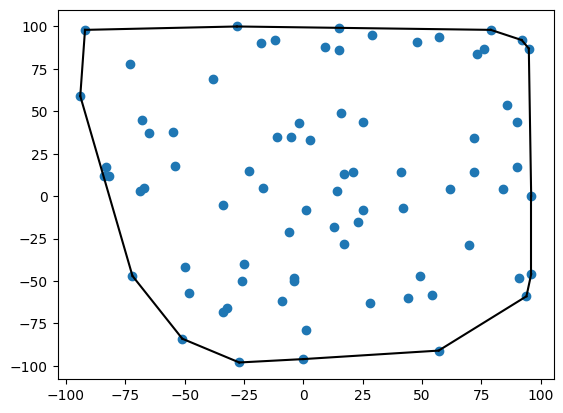

In [ ]:
#%%
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time

start_time = time.time()

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def distance(p1, p2, p):
    return ((p2[1] - p1[1]) * p[0] - (p2[0] - p1[0]) * p[1] + p2[0] * p1[1] - p2[1] * p1[0]) / \
           ((p2[1] - p1[1]) ** 2 + (p2[0] - p1[0]) ** 2) ** 0.5


def find_furthest_point(points, p1, p2):
    max_distance = 0
    furthest_point = None

    for p in points:
        d = distance(p1, p2, p)
        if d > max_distance:
            max_distance = d
            furthest_point = p

    return furthest_point


def find_hull(points, p1, p2, convex_hull):
    if len(points) == 0:
        return

    furthest_point = find_furthest_point(points, p1, p2)
    convex_hull.insert(convex_hull.index(p2), furthest_point)

    points.remove(furthest_point)

    points_left = []
    points_right = []

    for p in points:
        if distance(p1, furthest_point, p) > 0:
            points_left.append(p)
        elif distance(furthest_point, p2, p) > 0:
            points_right.append(p)

    find_hull(points_left, p1, furthest_point, convex_hull)
    find_hull(points_right, furthest_point, p2, convex_hull)


def quick_hull(points):
    if len(points) < 3:
        return points

    leftmost = min(points, key=lambda p: p[0])
    rightmost = max(points, key=lambda p: p[0])

    convex_hull = []

    convex_hull.append(leftmost)
    convex_hull.append(rightmost)

    points.remove(leftmost)
    points.remove(rightmost)

    points_left = []
    points_right = []

    for p in points:
        if distance(leftmost, rightmost, p) > 0:
            points_left.append(p)
        elif distance(leftmost, rightmost, p) < 0:
            points_right.append(p)

    find_hull(points_left, leftmost, rightmost, convex_hull)
    find_hull(points_right, rightmost, leftmost, convex_hull)

    return convex_hull


points = []
random.seed(204)  # Set a seed for reproducibility
# Generate 80 random points
for _ in range(80):
    x = random.randint(-100, 100)
    y = random.randint(-100, 100)
    points.append((x, y))

print("Points are: ",points)

convex_hull_points = quick_hull(points)

print("Convex Hull with Quickhull:")
for point in convex_hull_points:
   print(f"({point[0]}, {point[1]})")

points = np.array(points)

hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
# %%

- **Αλγόριθμος Διαίρει και Βασίλευε**

Points are:  [(1, -79), (49, -47), (-67, 5), (23, -15), (-73, 78), (44, -60), (-17, 5), (-82, 12), (-83, 17), (72, 34), (-9, -62), (-50, -42), (-25, -40), (-48, -57), (-23, 15), (-4, -48), (-18, 90), (-32, -66), (3, 33), (86, 54), (-92, 98), (-68, 45), (41, 14), (14, 3), (-5, 35), (-84, 12), (13, -18), (-54, 18), (-27, -98), (15, 99), (28, -63), (72, 14), (29, 95), (96, 0), (1, -8), (84, 4), (73, 84), (-94, 59), (100, -26), (-51, -84), (-65, 37), (48, 91), (79, 98), (15, 86), (57, -91), (16, 49), (76, 87), (90, 44), (42, -7), (-6, -21), (9, 88), (-69, 3), (-11, 35), (-34, -5), (17, -28), (96, -46), (-55, 38), (-4, -50), (94, -59), (92, 92), (-2, 43), (54, -58), (25, -8), (-95, -48), (-72, -47), (21, 14), (-26, -50), (62, 4), (17, 13), (91, -48), (-28, 100), (-12, 92), (70, -29), (57, 94), (0, -96), (95, 87), (25, 44), (-34, -68), (-38, 69), (90, 17)]
Convex Hull:
(-95, -48)
(-94, 59)
(-92, 98)
(-28, 100)
(79, 98)
(92, 92)
(95, 87)
(100, -26)
(94, -59)
(57, -91)
(0, -96)
(-27, -98)
(-51

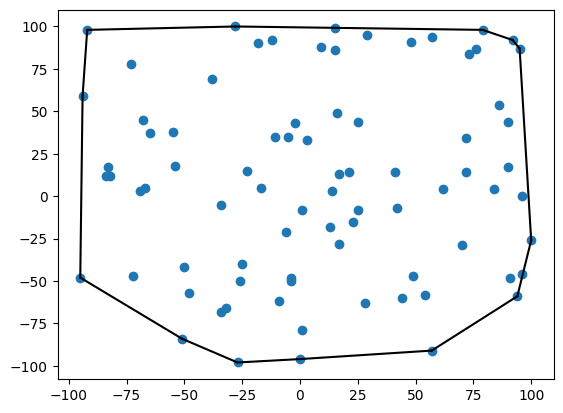

In [ ]:
#%%
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time

start_time = time.time()

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def divconq(points):
    n = len(points)

    if n < 3:
        return []

    hull = []

    leftmost = min(points, key=lambda p: p[0])
    hull.append(leftmost)

    p = points.index(leftmost)
    q = None

    while True:
        q = (p + 1) % n

        for r in range(n):
            if orientation(points[p], points[q], points[r]) == 2:
                q = r

        if points[q] == leftmost:
            break

        hull.append(points[q])
        p = q

    return hull


points = []
random.seed(204)  # Set a seed for reproducibility
# Generate 80 random points
for _ in range(80):
    x = random.randint(-100, 100)
    y = random.randint(-100, 100)
    points.append((x, y))

print("Points are: ",points)

convex_hull_points = divconq(points)

print("Convex Hull:")
for point in convex_hull_points:
    print(f"({point[0]}, {point[1]})")

points = np.array(points)

hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
# %%

- **Αυξητικός Αλγόριθμος**

Points are: 
(1, -79)
(49, -47)
(-67, 5)
(23, -15)
(-73, 78)
(44, -60)
(-17, 5)
(-82, 12)
(-83, 17)
(72, 34)
(-9, -62)
(-50, -42)
(-25, -40)
(-48, -57)
(-23, 15)
(-4, -48)
(-18, 90)
(-32, -66)
(3, 33)
(86, 54)
(-92, 98)
(-68, 45)
(41, 14)
(14, 3)
(-5, 35)
(-84, 12)
(13, -18)
(-54, 18)
(-27, -98)
(15, 99)
(28, -63)
(72, 14)
(29, 95)
(96, 0)
(1, -8)
(84, 4)
(73, 84)
(-94, 59)
(100, -26)
(-51, -84)
(-65, 37)
(48, 91)
(79, 98)
(15, 86)
(57, -91)
(16, 49)
(76, 87)
(90, 44)
(42, -7)
(-6, -21)
(9, 88)
(-69, 3)
(-11, 35)
(-34, -5)
(17, -28)
(96, -46)
(-55, 38)
(-4, -50)
(94, -59)
(92, 92)
(-2, 43)
(54, -58)
(25, -8)
(-95, -48)
(-72, -47)
(21, 14)
(-26, -50)
(62, 4)
(17, 13)
(91, -48)
(-28, 100)
(-12, 92)
(70, -29)
(57, 94)
(0, -96)
(95, 87)
(25, 44)
(-34, -68)
(-38, 69)
(90, 17)
Convex Hull:
(-27, -98)
(0, -96)
(57, -91)
(94, -59)
(100, -26)
(95, 87)
(92, 92)
(79, 98)
(-28, 100)
(-92, 98)
(-94, 59)
(-95, -48)
(-51, -84)
Execution time: 0.08219695091247559 seconds


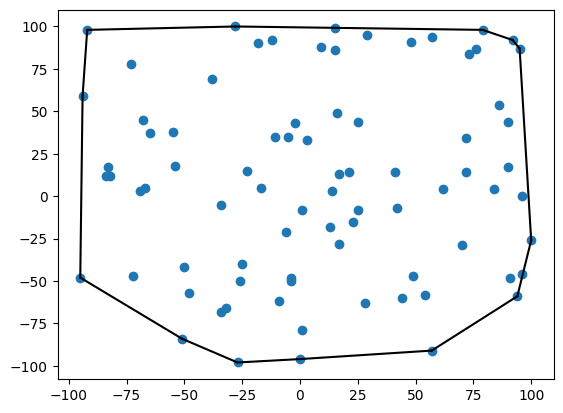

In [ ]:
#%%
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time

start_time = time.time()

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def incremental(points):
    n = len(points)

    if n < 3:
        return None

    # Find the point with the lowest y-coordinate
    lowest = min(points, key=lambda p: (p[1], p[0]))

    # Sort the points by polar angle with respect to the lowest point
    sorted_points = sorted(points, key=lambda p: (polar_angle(lowest, p), distance_eu(lowest, p)))

    # Initialize the stack with the first three points
    stack = [sorted_points[0], sorted_points[1], sorted_points[2]]

    for i in range(3, n):
        while len(stack) > 1 and orientation(stack[-2], stack[-1], sorted_points[i]) != 2:
            stack.pop()

        stack.append(sorted_points[i])

    return stack

def polar_angle(pivot, point):
    """
    Function to calculate the polar angle in radians between the pivot point and a given point.
    """
    dx = point[0] - pivot[0]
    dy = point[1] - pivot[1]

    return math.atan2(dy, dx)

def distance_eu(p1, p2):
    """
    Function to calculate Euclidean distance between two points.
    """
    dx = p1[0] - p2[0]
    dy = p1[1] - p2[1]

    return dx * dx + dy * dy


points = []
random.seed(204)  # Set a seed for reproducibility
# Generate 80 random points
print("Points are: ")
for _ in range(80):
    x = random.randint(-100, 100)
    y = random.randint(-100, 100)
    points.append((x, y))
    print(points[_])



hull = incremental(points)

print("Convex Hull:")
for point in hull:
    print(f"({point[0]}, {point[1]})")

points = np.array(points)

hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
# %%

- **Αλγόριθμος Περιτυλίγματος**

Points are:  [(1, -79), (49, -47), (-67, 5), (23, -15), (-73, 78), (44, -60), (-17, 5), (-82, 12), (-83, 17), (72, 34), (-9, -62), (-50, -42), (-25, -40), (-48, -57), (-23, 15), (-4, -48), (-18, 90), (-32, -66), (3, 33), (86, 54), (-92, 98), (-68, 45), (41, 14), (14, 3), (-5, 35), (-84, 12), (13, -18), (-54, 18), (-27, -98), (15, 99), (28, -63), (72, 14), (29, 95), (96, 0), (1, -8), (84, 4), (73, 84), (-94, 59), (100, -26), (-51, -84), (-65, 37), (48, 91), (79, 98), (15, 86), (57, -91), (16, 49), (76, 87), (90, 44), (42, -7), (-6, -21), (9, 88), (-69, 3), (-11, 35), (-34, -5), (17, -28), (96, -46), (-55, 38), (-4, -50), (94, -59), (92, 92), (-2, 43), (54, -58), (25, -8), (-95, -48), (-72, -47), (21, 14), (-26, -50), (62, 4), (17, 13), (91, -48), (-28, 100), (-12, 92), (70, -29), (57, 94), (0, -96), (95, 87), (25, 44), (-34, -68), (-38, 69), (90, 17)]
Convex Hull:
(-95, -48)
(-94, 59)
(-92, 98)
(-28, 100)
(79, 98)
(92, 92)
(95, 87)
(100, -26)
(94, -59)
(57, -91)
(0, -96)
(-27, -98)
(-51

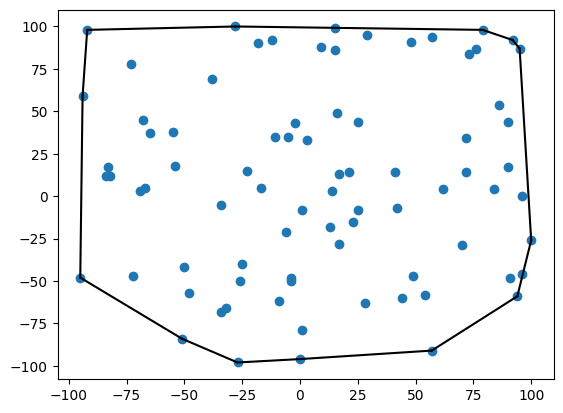

In [ ]:
#%%
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time

start_time = time.time()

def left_index(points):
    '''
    Finding the leftmost point
    '''
    min_index = 0
    for i in range(1, len(points)):
        if points[i][0] < points[min_index][0]:
            min_index = i
        elif points[i][0] == points[min_index][0]:
            if points[i][1] > points[min_index][1]:
                min_index = i
    return min_index

def orientation(p, q, r):
    '''
    0 --> p, q, r collinear
    1 --> Clockwise
    2 --> Counterclockwise
    '''
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2


def gift_wrapping(points):
    n = len(points)

    if n < 3:
        return []

    hull = []

    leftmost_index = left_index(points)
    hull.append(points[leftmost_index])

    p = leftmost_index
    q = None

    while True:
        q = (p + 1) % n

        for r in range(n):
            if orientation(points[p], points[q], points[r]) == 2:
                q = r

        if points[q] == points[leftmost_index]:
            break

        hull.append(points[q])
        p = q

    return hull

points = []
random.seed(204)  # Set a seed for reproducibility
# Generate 80 random points
for _ in range(80):
    x = random.randint(-100, 100)
    y = random.randint(-100, 100)
    points.append((x, y))

print("Points are: ",points)

convex_hull_points = gift_wrapping(points)
print("Convex Hull:")
for point in convex_hull_points:
    print(f"({point[0]}, {point[1]})")

points = np.array(points)

hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")
# %%

(β') Θα δείξουμε την οπτικοποίηση των βημάτων του **Αυξητικού Αλγόριθμου**

Έστω ότι έχουμε τα σημεία p1=(7,7), p2=(5,2), p3=(19,2), p4=(26,3),
p5=(-4,8), p6=(18,7), p7=(-9,6), p8=(1,1), p9=(15,5), p10=(10,4) τα οποία
αναπαρίστανται στο χώρο ως εξής:

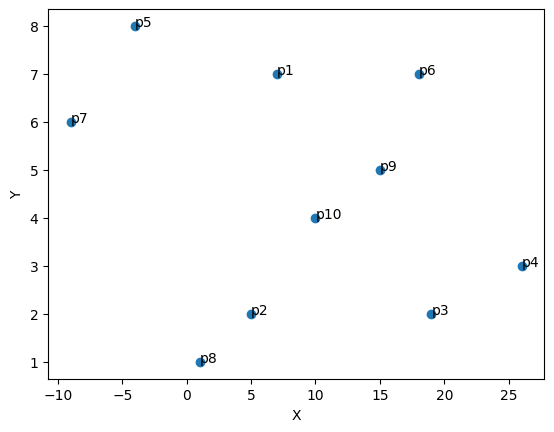

In [ ]:
points = [(7, 7), (5, 2), (19, 2), (26, 3), (-4, 8),
          (18, 7), (-9, 6), (1, 1), (15, 5), (10, 4)]
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
plt.scatter(x_coords, y_coords)
for i, point in enumerate(points):
    plt.annotate(f'p{i+1}', point)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



*   Αρχικά, διατάσσουμε τα σημεία σε αύξουσα λεξικογραφική διάτάξη, δηλαδή αύξουσα ταξινόμηση ως προς την τετμημένη τους: p7, p5, p8, p2, p1, p10, p9, p6, p3, p4

*   Θεωρούμε το άνω περίβλημα L_άνω=(p7,p5,p8)

*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&-9&6\\
1&-4&8\\
1&1&1
\end{bmatrix}=-45<0
\end{align}

  Άρα τα p7,p5,p8 ορίζουν αρνητική φορά και κρατάμε και τα 3 σημεία


*   Θεωρούμε περίβλημα L_άνω=(p7,p5,p8,p2)

*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&-4&8\\
1&1&1\\
1&5&2
\end{bmatrix}=33>0
\end{align}

  Άρα τα p5,p8,p2 ορίζουν θετική φορά και αφαιρούμε το p8



*   Θεωρούμε περίβλημα L_άνω=(p7,p5,p2,p1)

*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&-4&8\\
1&5&2\\
1&7&7
\end{bmatrix}=57>0
\end{align}

  Άρα τα p5,p2,p1 ορίζουν θετική φορά και αφαιρούμε το p2



*   Θεωρούμε περίβλημα L_άνω=(p7,p5,p1,p10)

*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&-4&8\\
1&7&7\\
1&10&4
\end{bmatrix}=-30>0
\end{align}

  Άρα τα p5,p1,p10 ορίζουν αρνητική φορά και κρατάμε όλα τα σημεία



*   Θεωρούμε περίβλημα L_άνω=(p7,p5,p1,p10,p9)


*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&7&7\\
1&10&4\\
1&15&5
\end{bmatrix}=15>0
\end{align}

  Άρα τα p1,p10,p9 ορίζουν θετική φορά και αφαιρούμε το p10

*   Θεωρούμε περίβλημα L_άνω=(p7,p5,p1,p9,p6)


*   Ελέγχουμε τη στροφή τους με τον υπολογισμό της ορίζουσας
\begin{align}
\begin{bmatrix}
1&7&7\\
1&15&5\\
1&16&7
\end{bmatrix}=22>0
\end{align}

  Άρα τα p1,p9,p6 ορίζουν θετική φορά και αφαιρούμε το p9



Συνεχίζουμε με την ίδια διαδικασία και καταλήγουμε πως  $L_{άνω}=(p7,p5,p1,p6,p4)$

* Ακολουθούμε την αντίστοιχη διαδικασία για το L_κάτω. Θεωρούμε
L_κάτω=(p4,p3,p6)


*   Ελέγχουμε τη στροφή των p4,p3,p6
\begin{align}
\begin{bmatrix}
1&26&3\\
1&19&2\\
1&18&7
\end{bmatrix}=-36<0
\end{align}

  Άρα ορίζουν αρνητική φορά και κρατάμε όλα τα σημεία

*   Θεωρούμε L_κάτω =(p4,p3,p6,p9)

*   Ελέγχουμε τη στροφή των p3,p6,p9
\begin{align}
\begin{bmatrix}
1&19&2\\
1&18&7\\
1&15&5
\end{bmatrix}=17>0
\end{align}

  Άρα ορίζουν θετική φορά και αφαιρούμε το p6

Αφαιρούμε από το L_κάτω το πρώτο και το τελευταίο σημείο του, ώστε
να αποφύγουμε την διπλή καταχώριση των κορυφών στις οποίες συναρμόζονται το άνω και το κάτω περίβλημα. Δηλαδή,
$L_{κάτω}=(p3,p10,p2,p8)$


Τελικά $L=(p7,p5,p1,p6,p4, p3,p10,p2,p8)$








2. Χρησιμοοποιώντας την συνάρτηση time της Python, εκτυπώνουμε το χρόνο που απαιτεί κάθε υλοποίηση του αλγορίθμου:



*   **QuickHull** Execution time: 0.7678837776184082 seconds

*   **Διαίρει και Βασίλευε** Execution time: 0.42061400413513184 seconds


*   **Αυξητικός Αλγόριθμος** Execution time: 0.46566104888916016
seconds


*   **Αλγόριθμος Περιτυλίγματος** Execution time: 0.39946818351745605
seconds



Παρατηρούμε ότι ο γρηγορότερος αλγόριθμος είναι αυτός του περιτυλίγματος, με βάση την υλοποίηση που ακολουθήσαμε, έχοντας ένα μικρό προβάδισμα έναντι των αλγορίθμων διαίρεσης και κυρτού περιβλήματος. Ο πιο χρονοβόρος αλγόριθμος είναι ο QuickHull, με χρόνο εκτέλεσης περίπου ένα δευτερόλεπτο. Όλοι οι αλγόριθμοι παράγουν σωστά αποτελέσματα.



3. Για αυτό το ερώτημα χρησιμοποιούμε το ίδιο πρόγραμμα όπως στην Υλοποίηση 1.3, μόνο που σε αυτήν την περίπτωση δημιουργούμε 50 τυχαία σημεία στον R3

In [ ]:
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time


num_points = 50
points = np.random.rand(num_points, 3)
print("Points: ", points)


hull = ConvexHull(points)


convex_hull_points = hull.points[hull.vertices]
print("Convex Hull Points: ")
print(convex_hull_points)

Points:  [[0.26569348 0.46254709 0.14380567]
 [0.1289076  0.96865532 0.92185881]
 [0.25362179 0.13613351 0.67239027]
 [0.19565776 0.40207784 0.51455145]
 [0.85855728 0.17719615 0.89579928]
 [0.9807086  0.31946797 0.97324973]
 [0.24610831 0.36968466 0.61600848]
 [0.34018928 0.81624585 0.4190507 ]
 [0.43451938 0.36469634 0.44885552]
 [0.68164638 0.25800037 0.65800103]
 [0.54496991 0.37751547 0.61485308]
 [0.36407619 0.02745621 0.64632589]
 [0.92938117 0.33729896 0.25371352]
 [0.48823574 0.03780056 0.87208219]
 [0.41154247 0.32205539 0.07260792]
 [0.34975716 0.8663526  0.80019157]
 [0.44365244 0.48510499 0.93708901]
 [0.78925406 0.03268618 0.8398722 ]
 [0.63568014 0.54720776 0.59868576]
 [0.24834301 0.81050799 0.96395926]
 [0.50182416 0.12039913 0.01241109]
 [0.73123162 0.41723411 0.81060877]
 [0.48029714 0.70669386 0.47545769]
 [0.74216655 0.58023587 0.43229913]
 [0.27832232 0.91341272 0.86734386]
 [0.31123942 0.27762373 0.71257878]
 [0.02931684 0.03919671 0.49436152]
 [0.99766225 0.2851

### ***Υλοποίηση 2***

1) Για αυτό το ερώτημα θα υλοποιήσουμε τον αλγόριθμο αναζήτησης σε KD-Tree. Χρησιμοποιούμε την βιβλιοθήκη SciPy της Python για την δημιουργία του δέντρου και στη συνέχεια ελέγχουμε ποιά σημεία από αυτά που δώθηκαν σαν είσοδος βρίσκονται στο εύρος του ορθογωνίου που ορίστηκε. Δώθηκαν κάποια τυχαία σημεία σαν παράδειγμα για την εξέταση λειτουργίας του προγράμματος.

In [ ]:
from scipy.spatial import KDTree
import numpy as np

data = np.array([[1, 2],
                 [3, 4],
                 [5, 6],
                 [7, 8]])
tree = KDTree(data)

#lower and upper bounds of the range
lower_bounds = np.array([2, 3])
upper_bounds = np.array([6, 7])

indices = np.all((data >= lower_bounds) & (data <= upper_bounds), axis=1)

result = data[indices]
print(result)

[[3 4]
 [5 6]]


2) To KD-Tree μπορεί να κατασκευαστεί σε χρόνο Ο(nlogn). Ενα ορθογωνικό εκτασιακό ερώτημα προς το kd-δέντρο μπορεί να απαντηθεί σε χρόνο
$\mathcal{O}{(\sqrt{n}+k)}$, όπου k είναι το πλήθος των αναφερόμενων σημείων.
Το πλήθος Q(n) των τεμνόμενων περιοχών σε ένα kd-δέντρο που έχει αποθηκευμένα n
σημεία ικανοποιεί την αναδρομική σχέση:
$Q(n) =
\begin{cases}
    O(1) & \text{if } n = 1 \\
    2 + 2Q\left(\frac{n}{4}\right) & \text{if } n > 1 \\
\end{cases}
$


### ***Εφαρμογή 2***

Δημιουργούμε 60 τυχαία σημεία στο επίπεδο με την συνάρτηση rand της Python, ορίζοντας ως seed το 22. Έπειτα, εφαρμόζουμε τον αλγόριθμο από την Υλοποίηση 2. Ορίζουμε τις συντεταγμένες του ορθογωνίου με τις μεταβλητές x_max,y_max, x_min, y_min και έπειτα τα αποτελέσματα που εκτυπώνονται είναι τα σημεία που βρίσκονται εντόε της ορθογώνιας έκτασης.

In [ ]:
from scipy.spatial import KDTree
import numpy as np

np.random.seed(22)
P = np.random.rand(60, 2)

tree = KDTree(P)
x_min = 0.2
x_max = 0.8
y_min = 0.3
y_max = 0.7
rectangular_extent = [(x_min, y_min), (x_max, y_max)]
indices = np.where((P[:, 0] >= x_min) & (P[:, 0] <= x_max) & (P[:, 1] >= y_min) & (P[:, 1] <= y_max))[0]
points_within_extent = P[indices]
print(points_within_extent)

[[0.20846054 0.48168106]
 [0.27053283 0.69104135]
 [0.76799274 0.68821832]
 [0.38718348 0.61520583]
 [0.42755524 0.58428964]
 [0.48428424 0.51577349]
 [0.60741386 0.44350009]
 [0.53876547 0.31342079]
 [0.57179515 0.46995241]
 [0.50816724 0.32375161]
 [0.26704437 0.66381935]
 [0.43498705 0.5146685 ]]


### ***Εφαρμογή 3***

1) Η τριγωνοποίηση Delaunay και το διάγραμμα Voronoi είναι στενά συνδεδεμένες γεωμετρικές δομές που παρέχουν συμπληρωματικές πληροφορίες για ένα σύνολο σημείων στο επίπεδο.

Η τριγωνοποίηση Delaunay δεδομένου συνόλου εστιών στο επίπεδο είναι ο δυϊκός γράφος του διαγράμματος Voronoi των εστιών. Κάθε κελί Voronoi αντιστοιχεί σε εστίες, δηλαδή κορυφές τριγώνων Delaunay, κάθε ζεύγος γειτονικών κελιών Voronoi (μια ακμή Voronoi) αντιστοιχεί σε μία ακμή Delaunay και κάθε κορυφή Voronoi αντιστοιχεί σε ένα τρίγωνο Delaunay.

 Η τριγωνοποίηση Delaunay αποκαλύπτει τη συνδεσιμότητα μεταξύ των σημείων, ενώ το διάγραμμα Voronoi ορίζει τις περιοχές επιρροής γύρω από κάθε σημείο. Μαζί, παρέχουν μια ολοκληρωμένη κατανόηση των χωρικών χαρακτηριστικών του συνόλου σημείων P.

 Το πακέτο SciPy της Python μας παρέχει έτοιμες συναρτήσεις κατασκευής τριγώνων Delaunay και διαγράμματος Voronoi. Παρακάτω ακολουθεί μια υλοποίηση και οπτικοποίηση αυτών με τη χρήση τυχαίων σημείων, με πορτοκαλί παρουσιάζεται η τριγωνοποίηση Delaunay και με μπλε το διάγραμμα Voronoi.

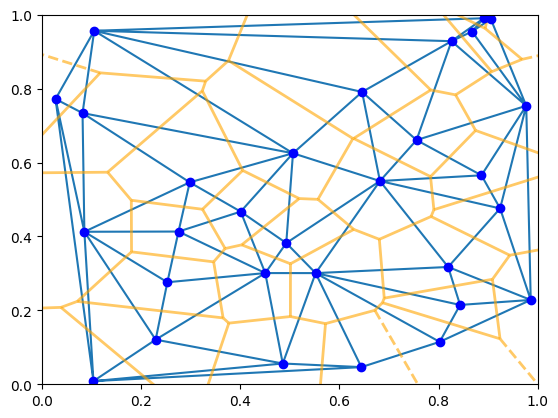

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

points = np.random.rand(20, 2)
tri = Delaunay(points)
vor = Voronoi(points)

fig, ax = plt.subplots()

#plot Delaunay
ax.triplot(points[:, 0], points[:, 1], tri.simplices)

#plot Voronoi
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6)


ax.plot(points[:, 0], points[:, 1], 'bo')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


plt.show()

2) Για τον αλγόριθμο που προσφέρεται για τριγωνοποίηση Delaunay γνωρίζουμε ότι η πολυπλοκότητά του είναι O(n log n) καθώς βασίζεται στη σταδιακή προσέγγιση που είναι γνωστή ως "διαίρει και βασίλευε". Το αρχικό βήμα περιλαμβάνει την ταξινόμηση των σημείων, η οποία απαιτεί O(n log n) πράξεις.
Η κατασκευή του ίδιου του τριγωνισμού απαιτεί επίσης O(n log n) πράξεις, επομένως η τελική πολυπλοκότητα είναι O(n log n).

Όσον αφορά τον αλγόριθμο δημιουργίας διαγράμματος Voronoi, στη γενική περίπτωση, η χρονική πολυπλοκότητα για την κατασκευή του διαγράμματος Voronoi είναι O(n log n). Ωστόσο, για εκφυλισμένες περιπτώσεις, όπως όταν τα σημεία είναι ομοιόμορφα κατανεμημένα σε μια ευθεία γραμμή, η πολυπλοκότητα μπορεί να αυξηθεί σε O(n^2).

Η σχέση μεταξύ του αριθμού των σημείων n και της πολυπλοκότητας αυτών των αλγορίθμων είναι γραμμική αλλά με διαφορετικούς συντελεστές. Τόσο η τριγωνοποίηση Delaunay όσο και η δημιουργία διαγράμματος Voronoi έχουν χρονική πολυπλοκότητα χειρότερης περίπτωσης O(n log n), αλλά οι σταθεροί συντελεστές μπορεί να διαφέρουν λόγω των τεχνικών που χρησιμοποιούνται. Καθώς ο αριθμός των σημείων αυξάνεται σημαντικά, το υπολογιστικό κόστος μπορεί να γίνει σημαντικό. Τελικά, είναι σημαντικό να λαμβάνεται υπόψη η αλγοριθμική πολυπλοκότητα όταν εργαζόμαστε με μεγάλα σύνολα δεδομένων.